In [1]:
from wann_genetic.tools import ExperimentSeries
from util import accuracy_swarmplot
import numpy as np
from matplotlib import pyplot as plt

In [2]:
from IPython.display import set_matplotlib_formats
%matplotlib inline
set_matplotlib_formats('svg')

In [3]:
data_dir = "../data/mnist_extensive/uniform_multiple_weights"
series = ExperimentSeries.from_spec_file(data_dir)
series.discover_data_dir()
df = series.assemble_stats()
series.var_names()

odict_keys(['distribution', 'task', 'seed', 'n_weights'])

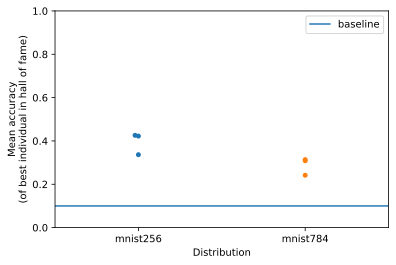

In [6]:
accuracy_swarmplot(data=df, x='task/_name', xlabel='Distribution', baseline=0.1)

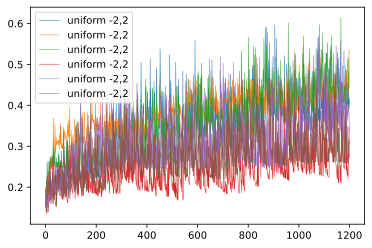

In [5]:
for c in series.configurations():
    env = series.configuration_env(c)
    
    if env is None:
        continue
    
    with env.open_data():
        metrics = env.load_gen_metrics()
    plt.plot(metrics['MAX:accuracy.mean'], label=series.flat_values(c)['distribution/_name'], linewidth=.5,)
    
plt.legend()
plt.show()